In [ ]:
%matplotlib widget

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython.display import display

from juart.analytical_phantoms.ellipsoids import Ellipsoid, Geometry, Tissue

# Create 3D Ellipsoid

In [2]:
tissue_params = {
    "spin": 0.8,
    "t1fitA": 0.324,
    "t1fitC": 0.137,
    "t2": 0.07,
    "chi": -7.5e-6,
    "tissue": "scalp",
}

geom_params = {
    "center": [0, 0, 0],
    "axes": [0.1, 0.2, 0.1],
    "angle": 0,
}

In [3]:
geom = Geometry(
    center=geom_params["center"], axes=geom_params["axes"], angle=geom_params["angle"]
)

tissue = Tissue(
    spin_density=tissue_params["spin"],
    t1_fitA=tissue_params["t1fitA"],
    t1_fitC=tissue_params["t1fitC"],
    t2=tissue_params["t2"],
    chi=tissue_params["chi"],
    type=tissue_params["tissue"],
)

ellipsoid = Ellipsoid(
    geometry=geom,
    tissue=tissue,
    counter=0,
)

seq_type = "GRE"
seq_params = {
    "te": [5e-3, 50e-3],
    "tr": 2,
    "flip": np.deg2rad(30),
    "b0": 3,
    "gamma": 42.567e6,
}

In [4]:
data = ellipsoid.get_object_signal(
    matrix=[256, 256, 256],
    fov=[0.5, 0.5, 0.5],
    seq_type=seq_type,
    seq_params=seq_params,
)

/tmp/ipykernel_59292/1869303469.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  shw = plt.imshow(np.abs(data[..., z0, 0]), cmap="gray")


IntSlider(value=128, description='Slice:', max=255)

IntSlider(value=0, description='Echo:', max=1)

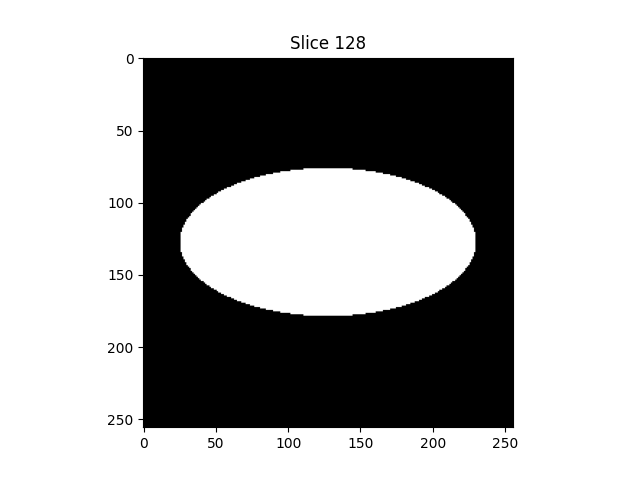

In [5]:
z0 = data.shape[2] // 2

plt.figure()
shw = plt.imshow(np.abs(data[..., z0, 0]), cmap="gray")


def update_slice(z, e):
    shw.set_data(np.abs(data[..., z, e]))
    plt.title(f"Slice {z}")


z_slider = widgets.IntSlider(
    value=z0, min=0, max=data.shape[2] - 1, step=1, description="Slice:"
)
e_slider = widgets.IntSlider(value=0, min=0, max=1, step=1, description="Echo:")
widgets.interactive(update_slice, z=z_slider, e=e_slider)
display(z_slider)
display(e_slider)

# Create 2D Ellipsoid

In [6]:
tissue_params = {
    "spin": 0.8,
    "t1fitA": 0.324,
    "t1fitC": 0.137,
    "t2": 0.07,
    "chi": -7.5e-6,
    "tissue": "scalp",
}

geom_params = {
    "center": [0, 0],
    "axes": [0.1, 0.2],
    "angle": 0,
}

In [7]:
geom = Geometry(
    center=geom_params["center"], axes=geom_params["axes"], angle=geom_params["angle"]
)

tissue = Tissue(
    spin_density=tissue_params["spin"],
    t1_fitA=tissue_params["t1fitA"],
    t1_fitC=tissue_params["t1fitC"],
    t2=tissue_params["t2"],
    chi=tissue_params["chi"],
    type=tissue_params["tissue"],
)

ellipsoid = Ellipsoid(
    geometry=geom,
    tissue=tissue,
    counter=0,
)

seq_type = "GRE"
seq_params = {
    "te": [5e-3, 50e-3],
    "tr": 2,
    "flip": np.deg2rad(30),
    "b0": 3,
    "gamma": 42.567e6,
}

In [8]:
data = ellipsoid.get_object_signal(
    matrix=[256, 256],
    fov=[0.5, 0.5],
    seq_type=seq_type,
    seq_params=seq_params,
)

/tmp/ipykernel_59292/2729514443.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  shw = plt.imshow(np.abs(data[..., 0]), cmap="gray")


IntSlider(value=0, description='Echo:', max=1)

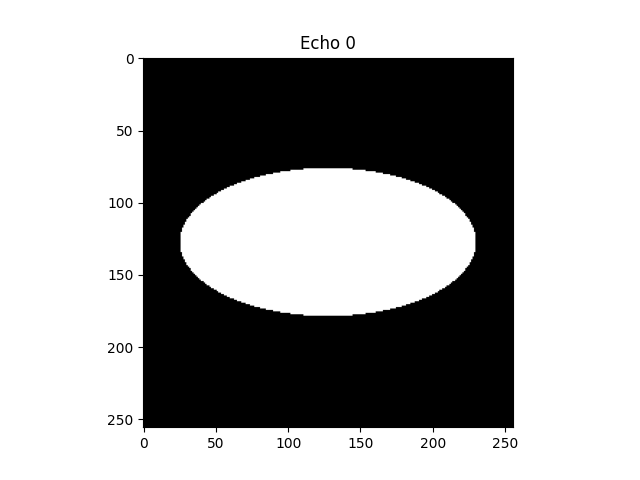

In [9]:
plt.figure()
shw = plt.imshow(np.abs(data[..., 0]), cmap="gray")


def update_slice(e):
    shw.set_data(np.abs(data[..., e]))
    plt.title(f"Echo {e}")


e_slider = widgets.IntSlider(value=0, min=0, max=1, step=1, description="Echo:")

widgets.interactive(update_slice, e=e_slider)

display(e_slider)

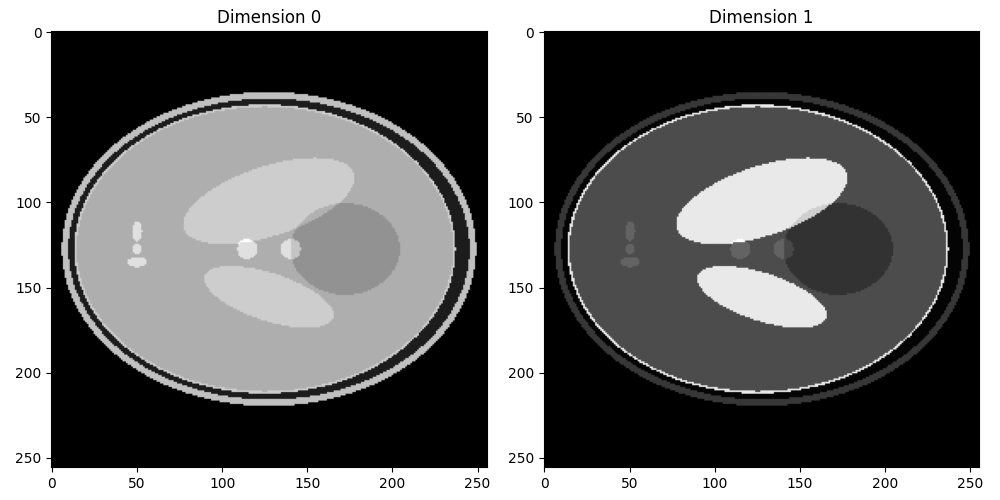

In [10]:
from juart.analytical_phantoms.ellipsoids import SheppLogan

sl = SheppLogan(fov=[0.2, 0.2], matrix=[256, 256], homogeneous=True)

seq_type = "GRE"
seq_params = {
    "te": [0, 100e-3],
    "tr": 4,
    "flip": np.deg2rad(40),
    "b0": 7,
    "gamma": 42.567e6,
}

output = []

for ellipsoid in sl.ellipsoids:
    output.append(
        ellipsoid.get_object_signal(
            matrix=[256, 256],
            fov=[0.2, 0.2],
            seq_type=seq_type,
            seq_params=seq_params,
        )
    )

d = torch.sum(torch.stack(output), dim=0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(d[..., 0], cmap="gray")
axes[0].set_title("Dimension 0")

axes[1].imshow(d[..., 1], cmap="gray")
axes[1].set_title("Dimension 1")

plt.tight_layout()
plt.show()